## SVM ：支持向量机

In [213]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings("ignore")

### 支持向量机带来的效果

#### 数据集
sklearn 中 datasets 中的 iris 数据集。iris 数据集是机器学习任务中常用的分类实验数据集，中文名是安德森鸢尾花卉数据集。 Iris 一共包含150个样本，分为3类，每类50个样本数据，每个样本数据有4维特征，分别是（花萼长度、花萼宽度、花瓣长度、花瓣宽度）
#### 机器学习任务
分类任务：预测样本属于哪一类

In [214]:
from sklearn.svm import SVC
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
Y = iris['target']

# 这里由于 iris 是三个类别的，我们 SVM 是二分类的，所以只取两类出来
setosa_or_versicolor = (Y==0) | (Y==1)
X = X[setosa_or_versicolor]
Y = Y[setosa_or_versicolor]

# 定义一个线性核函数的 SVM 分类器, 结果得到的是 W 和 b ， W 由 w1 和 w2 组成（因为特征是两维的）
svm_clf = SVC(kernel='linear' , C=float('inf'))
svm_clf.fit(X,Y)  

SVC(C=inf, kernel='linear')

####  将支持向量机的的求解结果绘图出来
左子图是随便画几条线作为决策平面看下分类效果，右子图是 SVM 求解出来的线（决策平面）的分类图

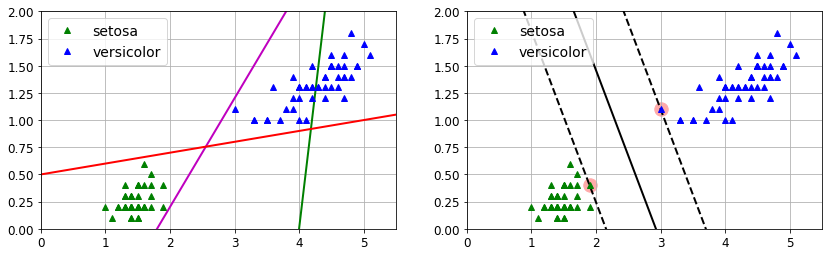

In [215]:
x0 = np.linspace(0, 5.5, 200)  #拟合200个点
# 随便指定三条线作为决策平面
pred1 = 5 * x0 - 20
pred2 = x0 - 1.8
pred3 = 0.1 * x0 + 0.5


def plot_decision_boundary(svm_clf , xmin , xmax , isSvm = True):
    
    # 获取 SVM 算出来的参数 w 和 b , 绘制决策平面 , 决策平面方程为 w1x1 + w2x2 + b = 0
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin , xmax , 200)
    decision_boundary_index = -w[0] / w[1] * x0 - b / w[1]
   
    #得到决策平面后， 就可以根据间隔 margin 计算出上下两个间隔边界，间隔边界方程为 wx + b = 1 和 wx + b = -1 , 所以间隔为 1/W[1]
    margin = 1 / w[1]
    gutter_up = decision_boundary_index + margin
    gutter_down = decision_boundary_index - margin
    if isSvm:
        # 得到所有的支持向量，这里支持向量是二维的
        svms = svm_clf.support_vectors_
        plt.scatter(svms[:,0] , svms[:,1] , s = 180 , facecolor = '#FFAAAA')
    plt.plot(x0 , decision_boundary_index , 'k-' , linewidth = 2)  
    plt.plot(x0 , gutter_up , 'k--' , linewidth = 2)
    plt.plot(x0 , gutter_down , 'k--' , linewidth = 2)

# 绘制样本数据函数，这里样本是两维的，我们用黄色点代表标签为0的数据点，蓝色代表标签为1的数据点
def plot_smaple(axis_Size):
    plt.plot(X[:,0][Y==0] , X[:,1][Y==0] , linewidth = 0 , color = 'g' , marker = '^' , label="setosa")
    plt.plot(X[:,0][Y==1] , X[:,1][Y==1] , linewidth = 0 , color = 'b' , marker = '^' , label= "versicolor")
    plt.grid(True)
    plt.axis(axis_Size)# 限制图像显示的范围，横轴只显示 0-5.5 ， 纵轴只显示 0-2
    plt.legend(loc = "upper left",fontsize = 14)

plt.figure(figsize=(14,4))

plt.subplot(121) #总共一行两列，这是第一列的子图
plt.plot(x0 , pred1 , 'g-' , linewidth = 2)
plt.plot(x0 , pred2 , 'm-' , linewidth = 2)
plt.plot(x0 , pred3 , 'r-' , linewidth = 2)
plot_smaple([0,5.5,0,2])
               
plt.subplot(122)
plot_decision_boundary(svm_clf , 0 , 5.5)
plot_smaple([0,5.5,0,2])
plt.show()

### 软间隔(soft margin)
可以使用超参数 C 控制软间隔程度

1.较高的C值，分类器会减少误分类，但最终会有较小间隔 \
2.较低的C值，间隔要大的多，但很多实例最终会出现在间隔之外

In [216]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
Y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline((
    ('std', StandardScaler()), #数据标准化
    ('linear_svm' , LinearSVC(C = 1))
))
svm_clf.fit(X,Y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svm', LinearSVC(C=1))])

对比不同 C 值所带来的差异

In [217]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1)
svm_clf2 = LinearSVC(C = 100)

scaled_svm_clf1 = Pipeline((
    ('std',scaler.fit(X)),
    ('linear_svm',svm_clf1)
))
scaled_svm_clf2 = Pipeline((
    ('std',scaler.fit(X)),
    ('linear_svm',svm_clf2)
))
scaled_svm_clf1.fit(X,Y)
scaled_svm_clf2.fit(X,Y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svm', LinearSVC(C=100))])

In [218]:
# 这里是因为之前对数据做了标准化，现在对求解得到的数值逆回来
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

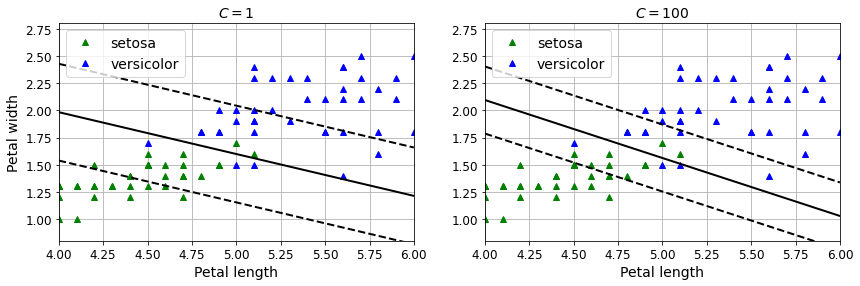

In [219]:
# 绘图
plt.figure(figsize=(14,4))
plt.subplot(121)
plot_smaple([4 , 6, 0.8 , 2.8])
plot_decision_boundary(svm_clf1,4,6,isSvm=False)
plt.xlabel("Petal length",fontsize = 14)
plt.ylabel("Petal width" , fontsize = 14)
plt.title("$C = {}$".format(svm_clf1.C) , fontsize = 14)


plt.subplot(122)
plot_smaple([4 , 6, 0.8 , 2.8])
plot_decision_boundary(svm_clf2 , 4 , 6 , isSvm=False)
plt.xlabel("Petal length",fontsize = 14)
plt.legend(loc = "upper left",fontsize = 14)
plt.title("$C = {}$".format(svm_clf2.C),fontsize = 14)

plt.show()

#### 效果解释
在上面两幅图可以看到，在左侧，我们使用了一个较小的 C 值，这样求出来的决策边界的间隔是很大的，但是会有比较大的误差 \
而在右侧，我们选用一个比较大的 C 值，这样求出来的决策边界的间隔是比较小的，但是决策边界间隔比较小，在训练数据上的分类效果很好，但容易过拟合

### 非线性支持向量机
数据集\
(1) 可以自己构建线性不可分的一些数据集，比如在下面，我们构建了9个样本在一维上是线性不可分的，但在二维上就线性可分了\
(2) 构建一些在二维线性不可分的数据，然后使用核函数投影


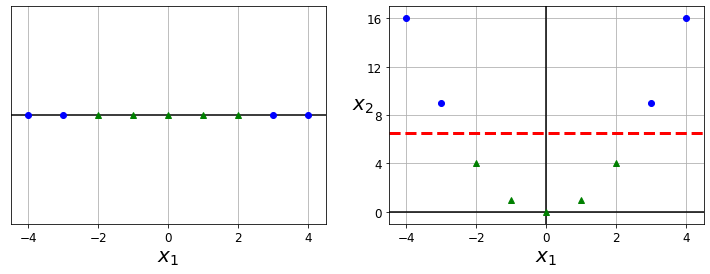

In [220]:
X1D = np.linspace(-4,4,9).reshape(-1,1)
X2D = np.c_[X1D,X1D**2]  #numpy的 c_ 函数是将两个矩阵横着拼接，使列数增加
y = np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0,color='k')
plt.plot(X1D[:,0][y==0],np.zeros(4), color = 'b' ,linewidth=0 ,marker='o')
plt.plot(X1D[:,0][y==1],np.zeros(5), color = 'g' ,linewidth=0 ,marker='o')
plt.gca().get_yaxis().set_ticks([]) #gca()获取当前的轴，get_yaxis()获取Y轴，set_ticks([])去掉y轴
plt.xlabel(r"$x_1$",fontsize=20)
plt.axis([-4.5,4.5,-0.2,0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.plot(X2D[:,0][y==0],X2D[:,1][y==0], color = 'b' ,linewidth=0 ,marker='o')
plt.plot(X2D[:,0][y==1],X2D[:,1][y==1], color = 'g' ,linewidth=0 ,marker='o')
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20, rotation=0.2)
plt.gca().get_yaxis().set_ticks([0,4,8,12,16]) #在 y 轴上显示刻度 0 4 8 12 16
plt.plot([-4.5,4.5],[6.5,6.5],'r--',linewidth=3)
plt.axis([-4.5,4.5,-1,17])

plt.subplots_adjust(right=1)
plt.show()

创建一份有点难度的数据

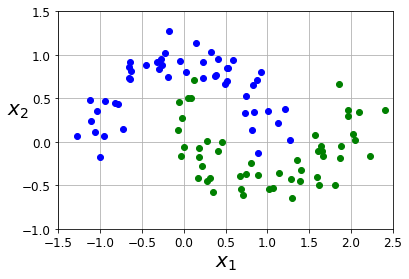

In [221]:
from sklearn.datasets import make_moons
X , y = make_moons(n_samples=100 , noise=0.15, random_state=42)  #make_moons 是生成一个两类半环形数据

def plot_dataset(X , y ,axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0] , color = 'b' ,linewidth=0 ,marker='o')
    plt.plot(X[:,0][y==1], X[:,1][y==1] , color = 'g' ,linewidth=0 ,marker='o')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(r"$x_1$",fontsize=20)
    plt.ylabel(r"$x_2$",fontsize=20, rotation=0)
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

### 方法一： 将数据升维，再进行线性划分

In [239]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
    ("poly_feature",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler().fit(X)),
    ("svm_clf" , LinearSVC(C=10,loss="hinge"))
))
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_feature', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

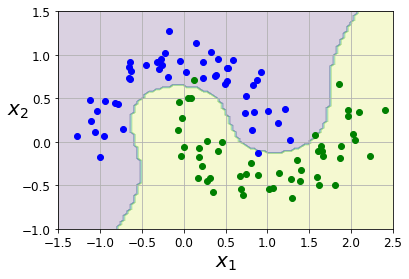

In [240]:
#利用上面训练好的支持向量机做预测，并绘制预测的等高线图
def plot_prediction(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)   #等高线图的对象是矩阵，因此需要将向量转化为矩阵
    X = np.c_[x0.ravel(),x1.ravel()]  
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,alpha = 0.2)

plot_prediction(polynomial_svm_clf , [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

### 方法二：使用核函数
核函数拥有核技巧(kernel tricks)，可以大大的减少计算量 

In [241]:
rbf_kernel_svm_clf = Pipeline((
    ("scale", StandardScaler().fit(X)),
    ("rbf_kernel", SVC(kernel='rbf',gamma=5,C=0.0001))
))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('rbf_kernel', SVC(C=0.0001, gamma=5))])

#### 高斯核函数的超参数 gamma 的影响
(1) gamma 越大，决策边界变的更不规则，在个别实例周围摆动\
(2) gamma 越小，边界变得更加平滑

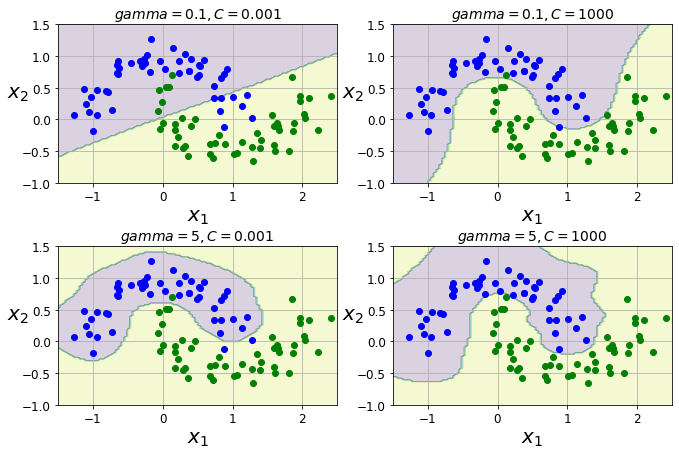

In [254]:
gamma1 , gamma2 = 0.1 ,5
C1 , C2 =0.001 , 1000
hyperparams =(gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline((
        ("scale", StandardScaler().fit(X)),
        ("rbf_kernel", SVC(kernel='rbf',gamma=gamma,C=C))
    ))
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11,7))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plt.subplots_adjust(hspace=0.4)
    plot_prediction(svm_clf,[-1.5,2.5,-1,1.5])
    plot_dataset(X,y,[-1.5,2.5,-1,1.5])
    gamma,C = hyperparams[i]
    plt.title(r"$gamma = {}, C={}$".format(gamma, C),fontsize=14)
plt.show()